# 按航空聯盟分類

**航空聯盟出現的次數**

In [1]:
import pandas as pd
import numpy as np

# 讀取資料
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight_final.csv'
df = pd.read_csv(data_path)

# 計算航空聯盟的出現次數
airline_combinations_count = df['航空聯盟'].value_counts()

# 將結果轉為 DataFrame，方便查看
result_df = airline_combinations_count.reset_index()
result_df.columns = ['航空聯盟', '出現次數']

# 排序按次數降序排列
result_df = result_df.sort_values(by='出現次數', ascending=False).reset_index(drop=True)
print(result_df)

# 移除包含 NaN 的數據
plot_data = df.dropna(subset=["平均價格_log", "最低價格_log", "最低價格剩餘天數", "價格變異_log", "中位數價格_log", "航空聯盟"])

   航空聯盟  出現次數
0     1  3346
1     2  2510
2     0  2409
3     3  1740
4     4   474


**Boxplot（按航空聯盟分類）**

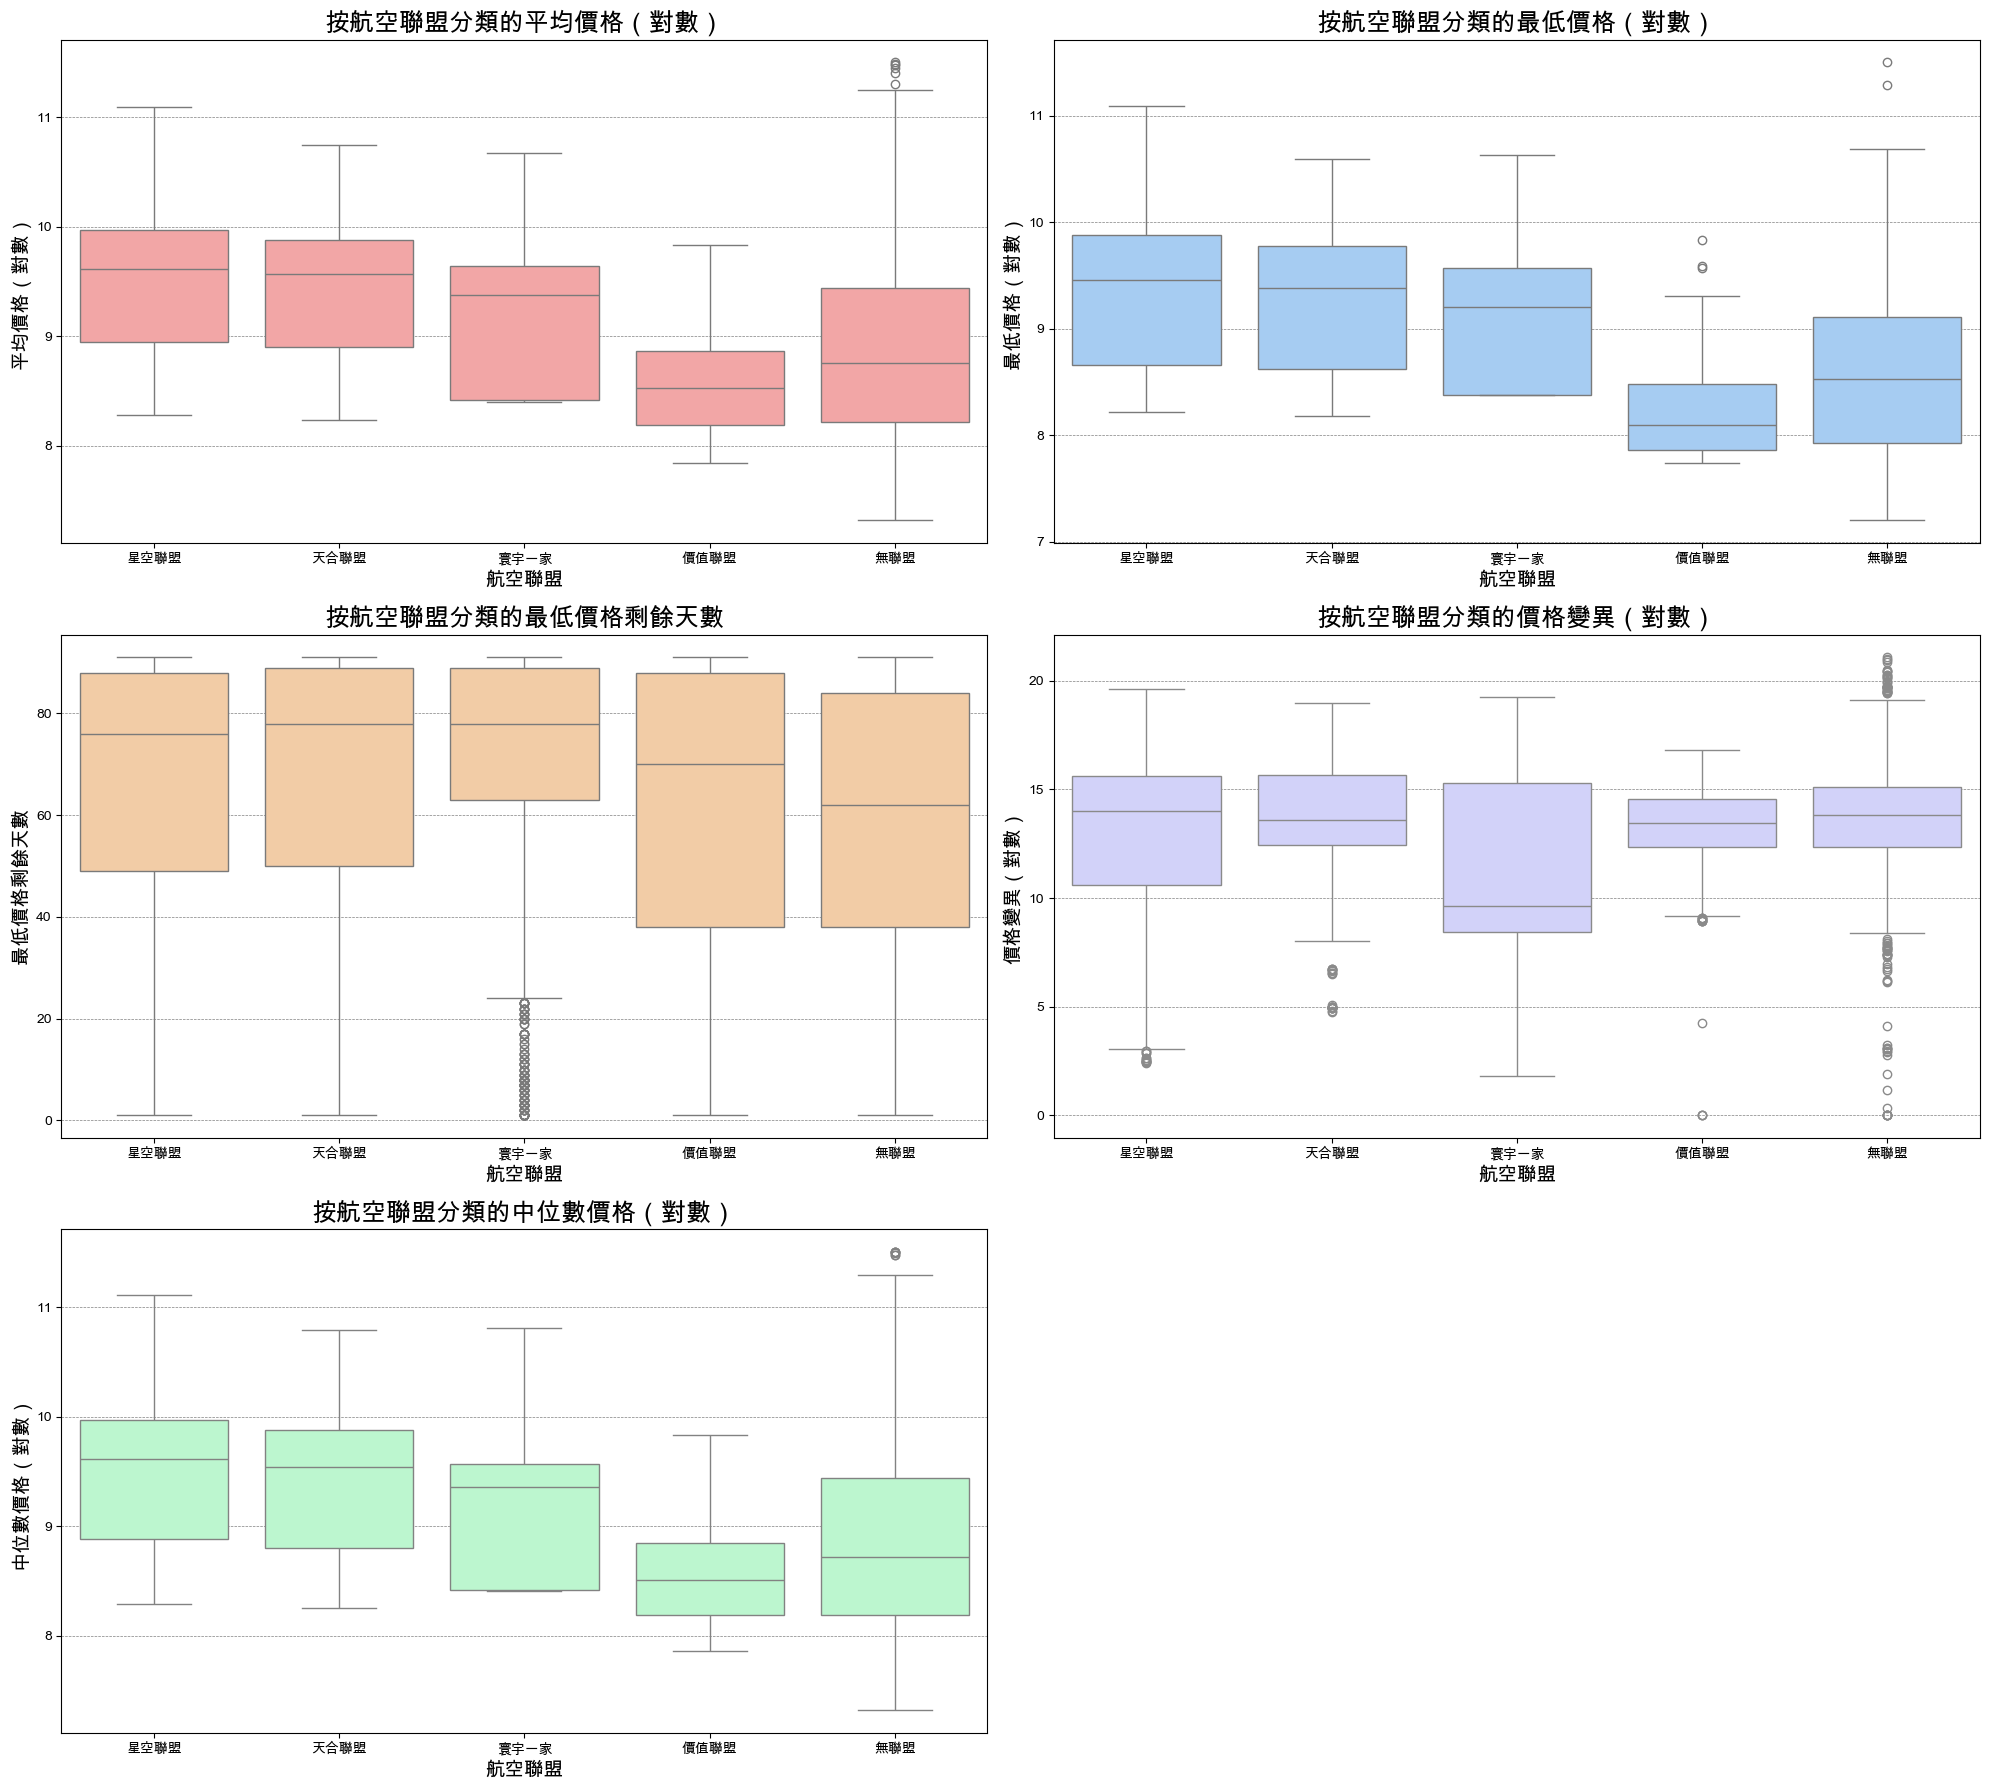

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 聯盟對應字典
alliance_mapping = {
    1: '星空聯盟',
    2: '天合聯盟',
    3: '寰宇一家',
    4: '價值聯盟',
    0: '無聯盟'
}

# 替換航空聯盟數值為聯盟名稱
plot_data['航空聯盟'] = plot_data['航空聯盟'].replace(alliance_mapping)

# 設定排序順序
alliance_order = ['星空聯盟', '天合聯盟', '寰宇一家', '價值聯盟', '無聯盟']
plot_data['航空聯盟'] = pd.Categorical(plot_data['航空聯盟'], categories=alliance_order, ordered=True)

# sort by 航空聯盟
plot_data = plot_data.sort_values(by='航空聯盟')

# 創建子圖，分別繪製對數轉換後的盒狀圖
fig, axes = plt.subplots(3, 2, figsize=(20, 18))  # 更新為 3x2 網格

# 調整圖表標題字體大小
title_fontsize = 18
label_fontsize = 14

# 第一個子圖：按航空聯盟分類的平均價格的盒狀圖（對數）
sns.boxplot(data=plot_data, x='航空聯盟', y='平均價格_log', ax=axes[0, 0], color='#FF9999')
axes[0, 0].set_title('按航空聯盟分類的平均價格（對數）', fontsize=title_fontsize)
axes[0, 0].set_xlabel('航空聯盟', fontsize=label_fontsize)
axes[0, 0].set_ylabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第二個子圖：按航空聯盟分類的最低價格的盒狀圖（對數）
sns.boxplot(data=plot_data, x='航空聯盟', y='最低價格_log', ax=axes[0, 1], color='#99CCFF')
axes[0, 1].set_title('按航空聯盟分類的最低價格（對數）', fontsize=title_fontsize)
axes[0, 1].set_xlabel('航空聯盟', fontsize=label_fontsize)
axes[0, 1].set_ylabel('最低價格（對數）', fontsize=label_fontsize)
axes[0, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第三個子圖：按航空聯盟分類的最低價格剩餘天數的盒狀圖
sns.boxplot(data=plot_data, x='航空聯盟', y='最低價格剩餘天數', ax=axes[1, 0], color='#FFCC99')
axes[1, 0].set_title('按航空聯盟分類的最低價格剩餘天數', fontsize=title_fontsize)
axes[1, 0].set_xlabel('航空聯盟', fontsize=label_fontsize)
axes[1, 0].set_ylabel('最低價格剩餘天數', fontsize=label_fontsize)
axes[1, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第四個子圖：按航空聯盟分類的價格變異（對數）的盒狀圖
sns.boxplot(data=plot_data, x='航空聯盟', y='價格變異_log', ax=axes[1, 1], color='#CCCCFF')
axes[1, 1].set_title('按航空聯盟分類的價格變異（對數）', fontsize=title_fontsize)
axes[1, 1].set_xlabel('航空聯盟', fontsize=label_fontsize)
axes[1, 1].set_ylabel('價格變異（對數）', fontsize=label_fontsize)
axes[1, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第五個子圖：按航空聯盟分類的中位數價格（對數）的盒狀圖
sns.boxplot(data=plot_data, x='航空聯盟', y='中位數價格_log', ax=axes[2, 0], color='#B3FFCC')
axes[2, 0].set_title('按航空聯盟分類的中位數價格（對數）', fontsize=title_fontsize)
axes[2, 0].set_xlabel('航空聯盟', fontsize=label_fontsize)
axes[2, 0].set_ylabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 移除未使用的子圖
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

**Kruskal-Wallis H Test**

In [3]:
from scipy.stats import kruskal

# 提取需要分析的數據
anova_data = df[['航空聯盟', '平均價格_log', '最低價格_log', '中位數價格_log', '價格變異_log', '最低價格剩餘天數']].dropna()

# Kruskal-Wallis 檢測函數
def perform_kruskal(data, response_var):
    # 分組數據
    groups = [data[data['航空聯盟'] == alliance][response_var] for alliance in data['航空聯盟'].unique()]
    stat, p_value = kruskal(*groups)
    return stat, p_value

# 儲存檢測結果
results = []

# 分別對每個變量進行檢測
for var in ['平均價格_log', '最低價格_log', '中位數價格_log', '價格變異_log', '最低價格剩餘天數']:
    stat, p_value = perform_kruskal(anova_data, var)
    results.append({
        "變數": var,
        "H-statistic": stat,
        "p-value": p_value,
        "顯著性": "顯著" if p_value and p_value < 0.05 else "不顯著"
    })
        
# 將結果轉為 DataFrame 以便查看
results_df = pd.DataFrame(results)

# 顯示結果
print(results_df)

          變數  H-statistic        p-value  顯著性
0   平均價格_log  1380.084443  1.438717e-297   顯著
1   最低價格_log  1777.829788   0.000000e+00  不顯著
2  中位數價格_log  1359.372227  4.456751e-293   顯著
3   價格變異_log   392.789763   1.004900e-83   顯著
4   最低價格剩餘天數   239.204482   1.376456e-50   顯著


**Tukey HSD**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.6196    0.0  0.5692    0.67   True
     0      2   0.5494    0.0  0.4957  0.6032   True
     0      3   0.3805    0.0  0.3211  0.4398   True
     0      4  -0.2952    0.0   -0.39 -0.2005   True
     1      2  -0.0702 0.0011   -0.12 -0.0204   True
     1      3  -0.2392    0.0 -0.2949 -0.1834   True
     1      4  -0.9148    0.0 -1.0074 -0.8223   True
     2      3   -0.169    0.0 -0.2278 -0.1102   True
     2      4  -0.8447    0.0 -0.9391 -0.7502   True
     3      4  -0.6757    0.0 -0.7734  -0.578   True
----------------------------------------------------


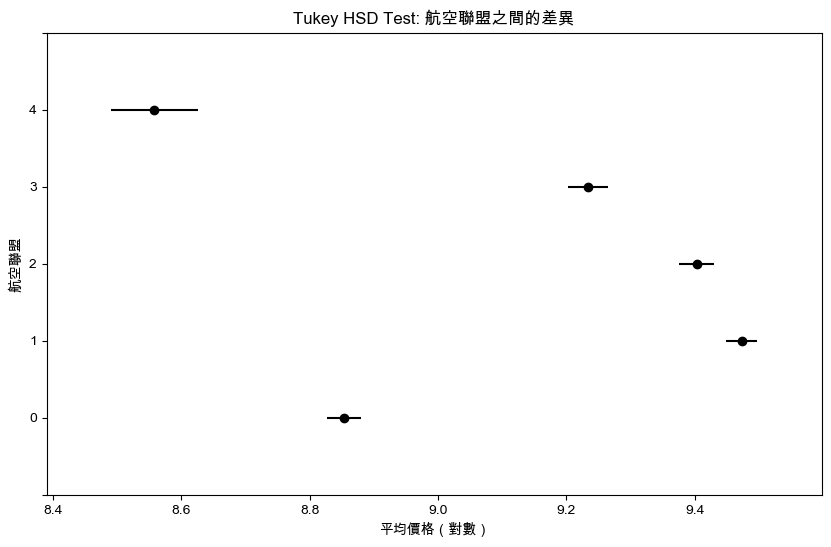

In [4]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 執行 Tukey HSD 測試
tukey = pairwise_tukeyhsd(endog=anova_data['平均價格_log'], groups=anova_data['航空聯盟'], alpha=0.05)

# 輸出測試結果
print(tukey)

# 繪製 Tukey HSD 結果
tukey.plot_simultaneous()
plt.title('Tukey HSD Test: 航空聯盟之間的差異')
plt.xlabel('平均價格（對數）')
plt.ylabel('航空聯盟')
plt.show()

**Boxplot/Histogram**
（按航空聯盟分類）

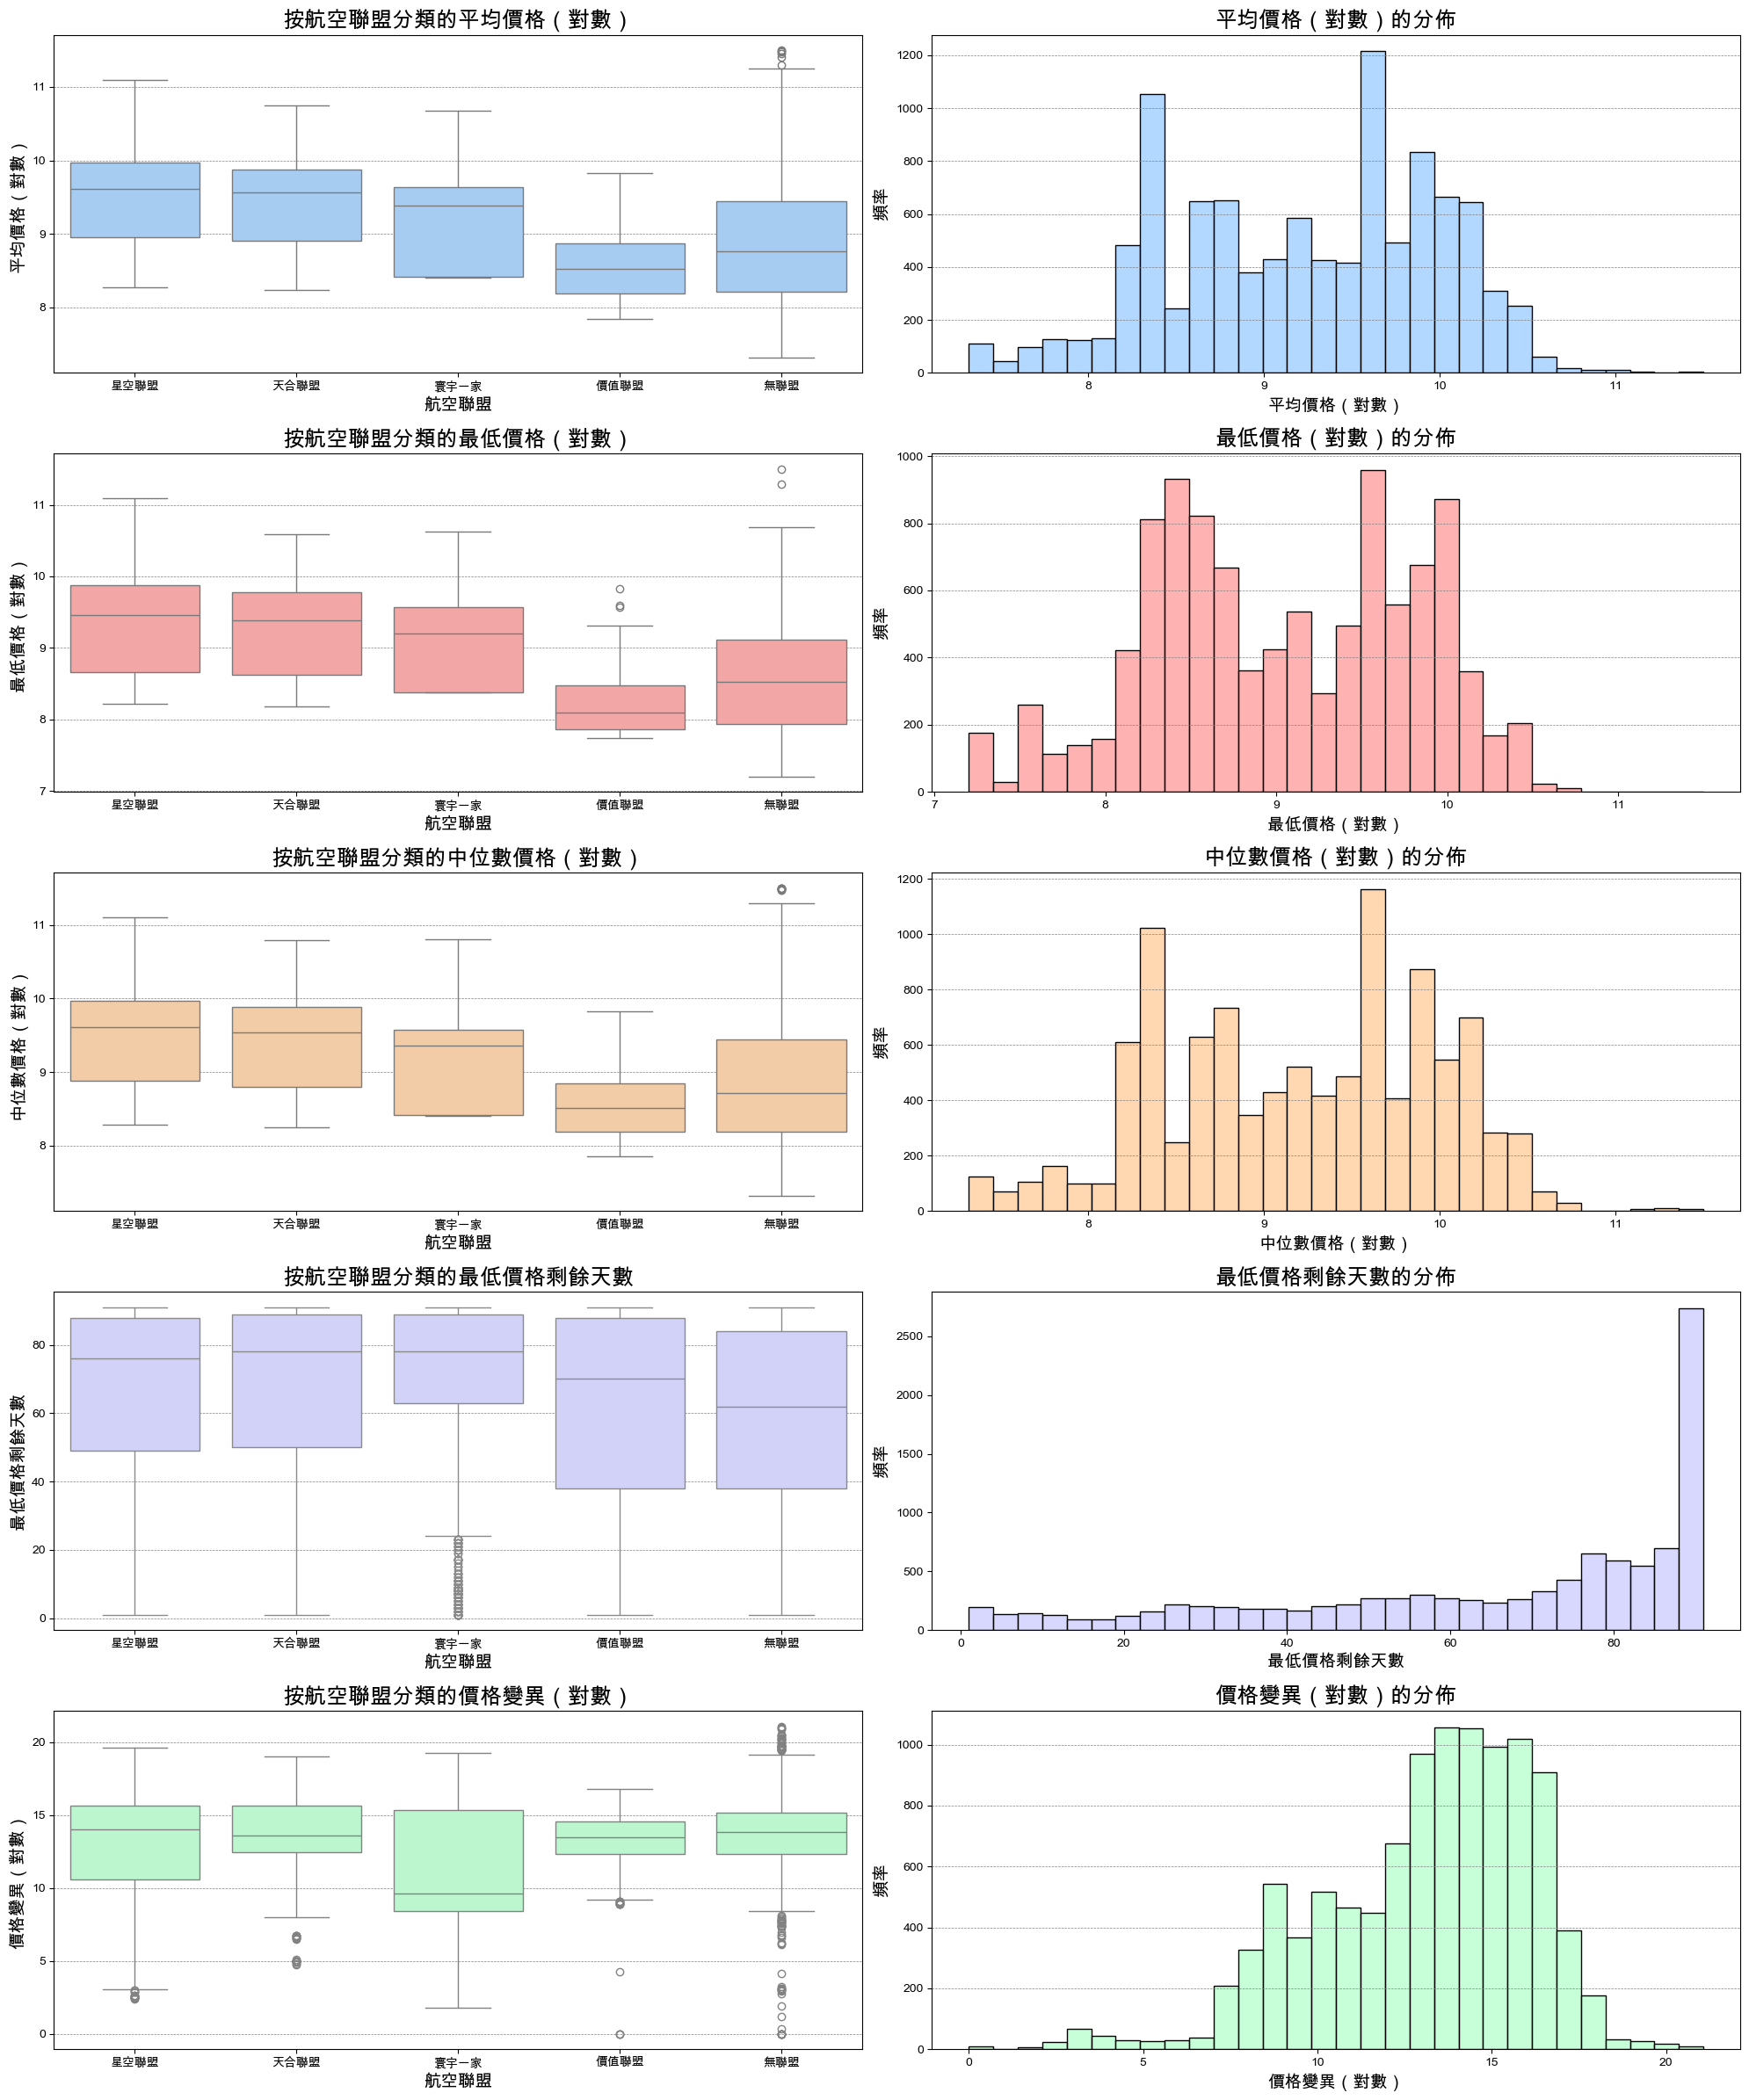

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 創建 5x2 子圖
fig, axes = plt.subplots(5, 2, figsize=(20, 24))
bins = 30

# 調整字體大小
title_fontsize = 18
label_fontsize = 14

# 第一行子圖：航空聯盟分類的平均價格（對數）
sns.boxplot(data=plot_data, x='航空聯盟', y='平均價格_log', ax=axes[0, 0], color='#99CCFF')
axes[0, 0].set_title('按航空聯盟分類的平均價格（對數）', fontsize=title_fontsize)
axes[0, 0].set_xlabel('航空聯盟', fontsize=label_fontsize)
axes[0, 0].set_ylabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['平均價格_log'], kde=False, color='#99CCFF', ax=axes[0, 1], bins=bins)
axes[0, 1].set_title('平均價格（對數）的分佈', fontsize=title_fontsize)
axes[0, 1].set_xlabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[0, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第二行子圖：航空聯盟分類的最低價格（對數）
sns.boxplot(data=plot_data, x='航空聯盟', y='最低價格_log', ax=axes[1, 0], color='#FF9999')
axes[1, 0].set_title('按航空聯盟分類的最低價格（對數）', fontsize=title_fontsize)
axes[1, 0].set_xlabel('航空聯盟', fontsize=label_fontsize)
axes[1, 0].set_ylabel('最低價格（對數）', fontsize=label_fontsize)
axes[1, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['最低價格_log'], kde=False, color='#FF9999', ax=axes[1, 1], bins=bins)
axes[1, 1].set_title('最低價格（對數）的分佈', fontsize=title_fontsize)
axes[1, 1].set_xlabel('最低價格（對數）', fontsize=label_fontsize)
axes[1, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[1, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第三行子圖：航空聯盟分類的中位數價格（對數）
sns.boxplot(data=plot_data, x='航空聯盟', y='中位數價格_log', ax=axes[2, 0], color='#FFCC99')
axes[2, 0].set_title('按航空聯盟分類的中位數價格（對數）', fontsize=title_fontsize)
axes[2, 0].set_xlabel('航空聯盟', fontsize=label_fontsize)
axes[2, 0].set_ylabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['中位數價格_log'], kde=False, color='#FFCC99', ax=axes[2, 1], bins=bins)
axes[2, 1].set_title('中位數價格（對數）的分佈', fontsize=title_fontsize)
axes[2, 1].set_xlabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[2, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第四行子圖：航空聯盟分類的最低價格剩餘天數
sns.boxplot(data=plot_data, x='航空聯盟', y='最低價格剩餘天數', ax=axes[3, 0], color='#CCCCFF')
axes[3, 0].set_title('按航空聯盟分類的最低價格剩餘天數', fontsize=title_fontsize)
axes[3, 0].set_xlabel('航空聯盟', fontsize=label_fontsize)
axes[3, 0].set_ylabel('最低價格剩餘天數', fontsize=label_fontsize)
axes[3, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['最低價格剩餘天數'], kde=False, color='#CCCCFF', ax=axes[3, 1], bins=bins)
axes[3, 1].set_title('最低價格剩餘天數的分佈', fontsize=title_fontsize)
axes[3, 1].set_xlabel('最低價格剩餘天數', fontsize=label_fontsize)
axes[3, 1].set_ylabel('頻率', fontsize=label_fontsize)

# 第五行子圖：航空聯盟分類的價格變異（對數）
sns.boxplot(data=plot_data, x='航空聯盟', y='價格變異_log', ax=axes[4, 0], color='#B3FFCC')
axes[4, 0].set_title('按航空聯盟分類的價格變異（對數）', fontsize=title_fontsize)
axes[4, 0].set_xlabel('航空聯盟', fontsize=label_fontsize)
axes[4, 0].set_ylabel('價格變異（對數）', fontsize=label_fontsize)
axes[4, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['價格變異_log'], kde=False, color='#B3FFCC', ax=axes[4, 1], bins=bins)
axes[4, 1].set_title('價格變異（對數）的分佈', fontsize=title_fontsize)
axes[4, 1].set_xlabel('價格變異（對數）', fontsize=label_fontsize)
axes[4, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[4, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 自動調整子圖間距
plt.tight_layout()
plt.show()